In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [2]:
import numpy as np

In [3]:
model = ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 43s 0us/step


In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

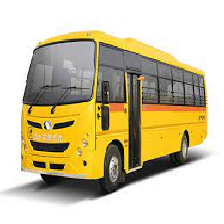

In [5]:
img_path = 'bus.jpg'
img = load_img(img_path, target_size=(224, 224))
img

In [6]:
x = img_to_array(img)

In [7]:
x.shape

(224, 224, 3)

In [8]:
x = x.reshape(1,224,224,3)

In [9]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [10]:
x = preprocess_input(x) #The preprocess_input function is meant to adequate your image to the format the model requires
x.shape

(1, 224, 224, 3)

In [11]:
preds = model.predict(x)

In [12]:
preds.round(2)
np.argmax(preds,axis=1)

array([779], dtype=int64)

In [13]:
print('Predicted:', decode_predictions(preds, top=3)[0])
#Returns. A list of lists of top class prediction tuples (class_name, class_description, score) . 
#One list of tuples per sample in batch input.

49152/35363 [=========================================] - 0s 1us/step
Predicted: [('n04146614', 'school_bus', 0.8375372), ('n03769881', 'minibus', 0.09726954), ('n03895866', 'passenger_car', 0.06316521)]
